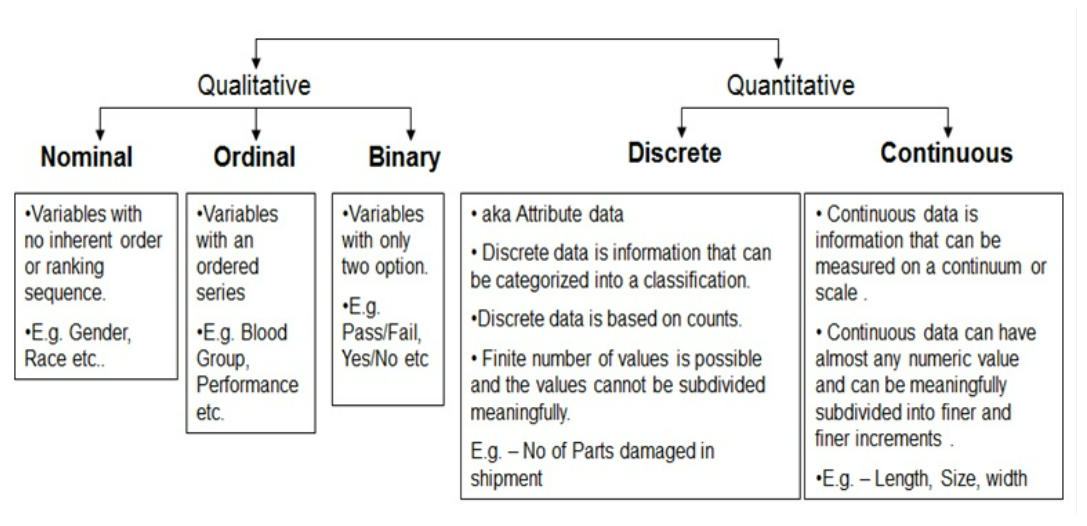

# One-Hot Encoding (OHE):
## Categorical data consists of discrete and unordered categories or labels. Examples include color names, city names, or any other non-numeric labels.ries.

## Methodology: Represents each categorical variable as a binary vector where only one element is 1, indicating the category.
## When to Use: Simple representation for categorical variables when there's no inherent ordinal relationship.
## Advantage: Easy to implement and understand.
## Disadvantage: High-dimensional, doesn't capture relationships between categories.

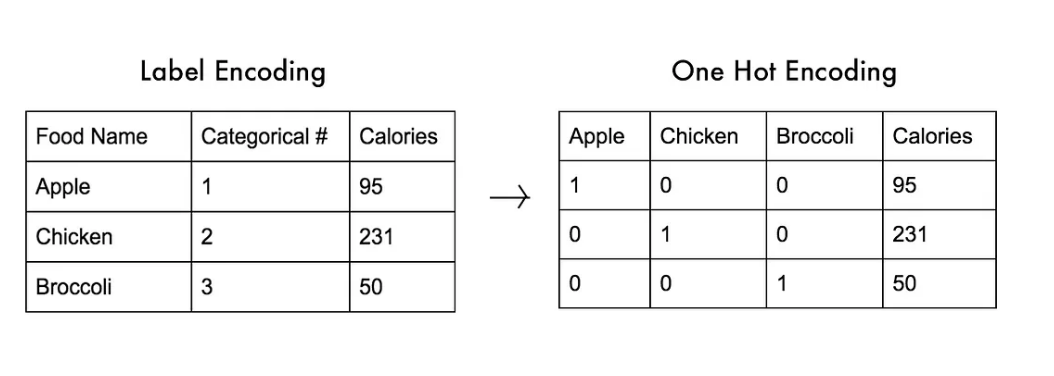

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample categorical data
data = {'Category': ['Red', 'Green', 'Blue', 'Red', 'Green']}

# Create a DataFrame
df = pd.DataFrame(data)

# Use OneHotEncoder
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[['Category']]).toarray()

# Create a new DataFrame with one-hot encoded values
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Category']))

# Concatenate the original DataFrame and the one-hot encoded DataFrame
result_df = pd.concat([df, one_hot_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(result_df)

Original DataFrame:
  Category
0      Red
1    Green
2     Blue
3      Red
4    Green

One-Hot Encoded DataFrame:
  Category  Category_Blue  Category_Green  Category_Red
0      Red            0.0             0.0           1.0
1    Green            0.0             1.0           0.0
2     Blue            1.0             0.0           0.0
3      Red            0.0             0.0           1.0
4    Green            0.0             1.0           0.0


# Ordinal Categorical Embedding
## Ordinal data involves categories with a specific order or ranking.

## Methodology: Assigns a unique numerical value to each category based on its ordinal position.
## When to Use: When there is a clear ordinal relationship between categories.
## Advantage: Captures ordinal information.
## Disadvantage: Assumes equal spacing between categories, may not represent true relationships.

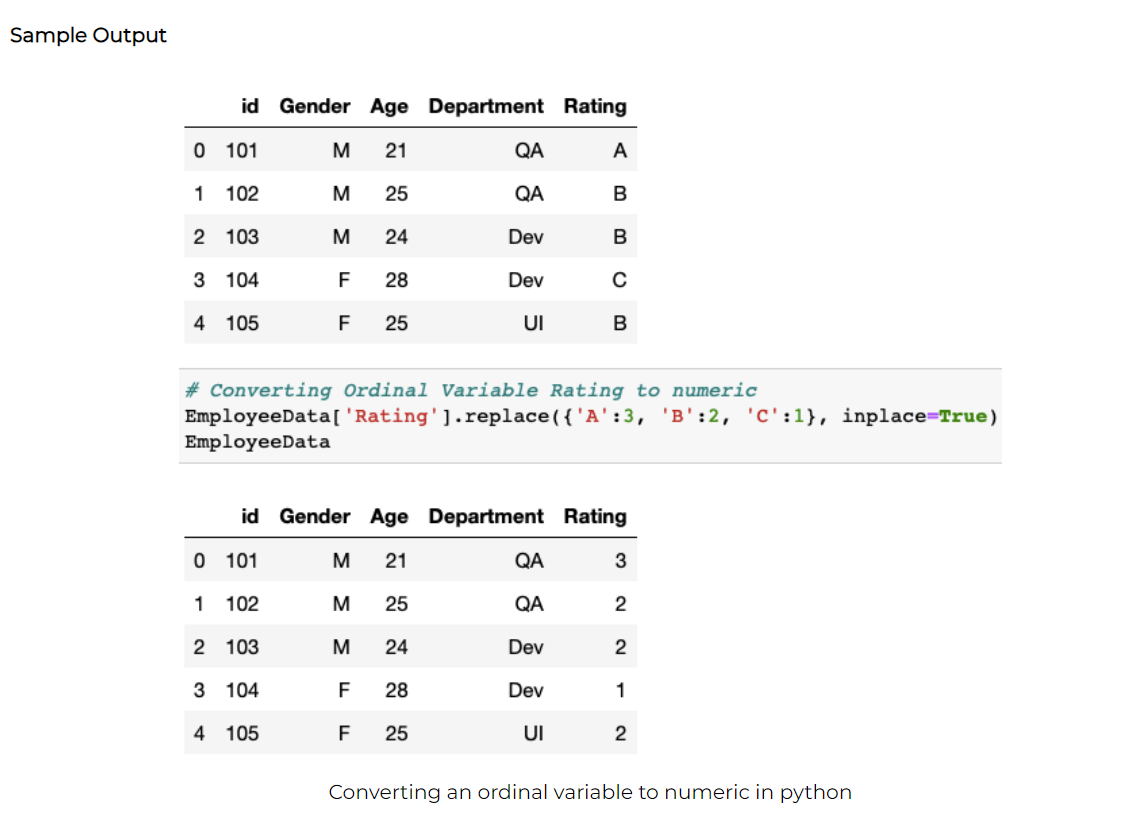

In [11]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Sample ordinal data
data = {'Satisfaction': ['Medium', 'Low', 'High', 'Medium', 'Low']}

# Create a DataFrame
df = pd.DataFrame(data)

# Use OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
ordinal_encoded = encoder.fit_transform(df[['Satisfaction']])

# Add the encoded column to the original DataFrame
df['Satisfaction_Encoded'] = ordinal_encoded

print("Original DataFrame:")
print(df)

Original DataFrame:
  Satisfaction  Satisfaction_Encoded
0       Medium                   1.0
1          Low                   0.0
2         High                   2.0
3       Medium                   1.0
4          Low                   0.0


# Bag-of-Words (BoW):
## Overview: BoW represents a document as an unordered set of words, disregarding grammar and word order. Each word is assigned a unique index, and the vector is created by counting the occurrences of each word.

## Methodology: Represents a document as an unordered set of words, ignoring grammar and word order.
## When to Use: Text classification, sentiment analysis, and document retrieval.
## Advantage: Simple, computationally efficient.
## Disadvantage: Ignores word order and context.

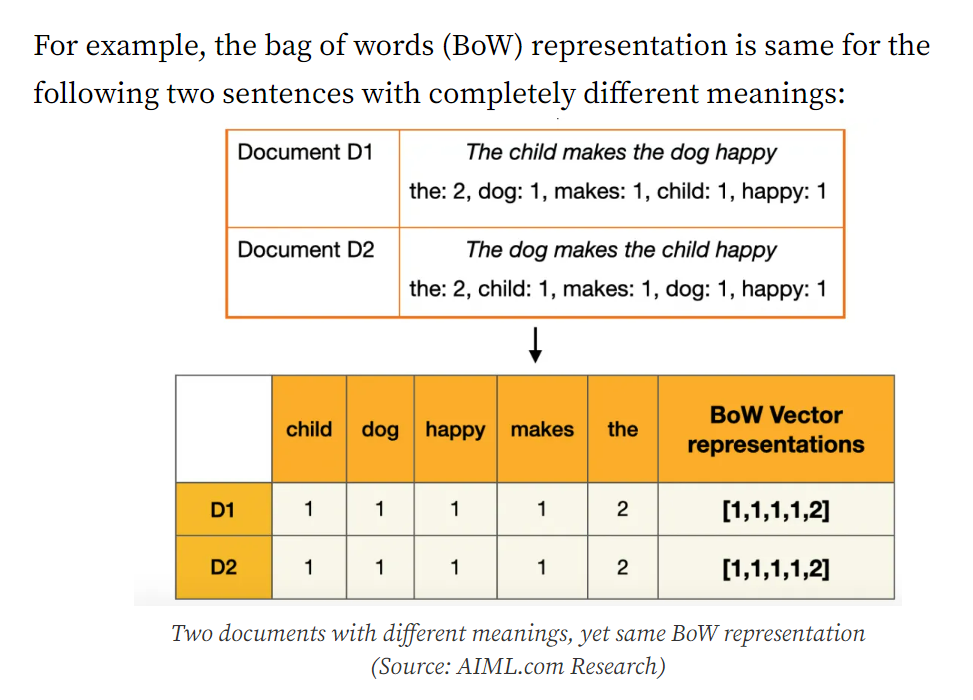

In [7]:
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

sentence = "India will win T20 world cup, Go India."
tokens = word_tokenize(sentence.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

freq_dist = FreqDist(filtered_tokens)
bow_vector = [freq_dist[word] for word in freq_dist]

print("Bag-of-Words Vector:", bow_vector)

Bag-of-Words Vector: [2, 1, 1, 1, 1, 1]


# TF-IDF (Term Frequency-Inverse Document Frequency):
## Overview: TF-IDF combines term frequency and inverse document frequency to assign weights to words. It reflects the importance of a word in a document relative to its importance across multiple documents.

## Methodology: Weighs the importance of each term based on its frequency in a document and across all documents.
## When to Use: Information retrieval, document clustering.
## Advantage: Considers term importance, reduces the impact of common words.
## Disadvantage: Sparse representation, loses word order.

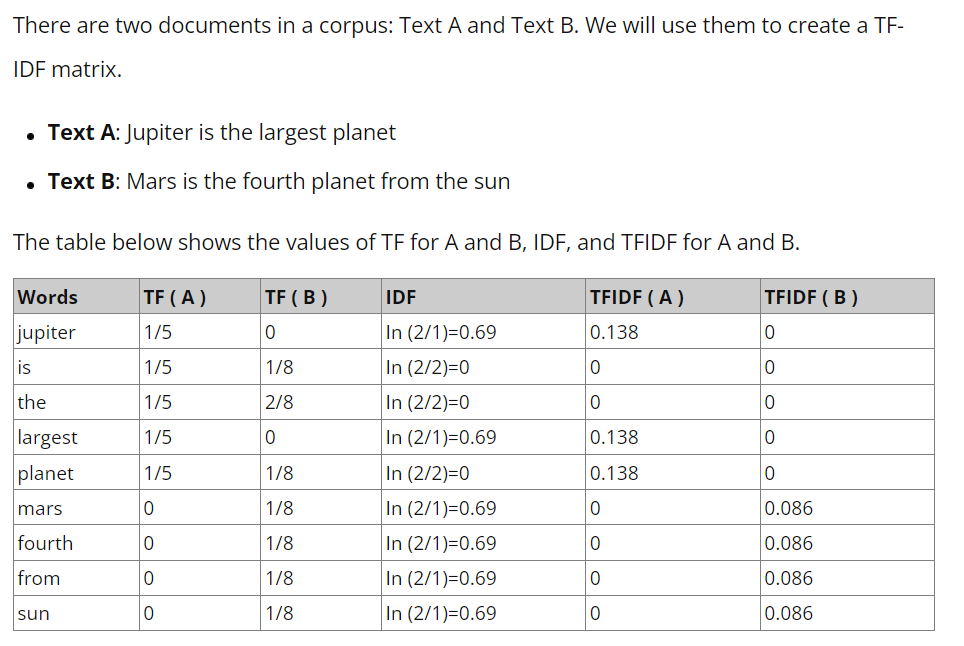

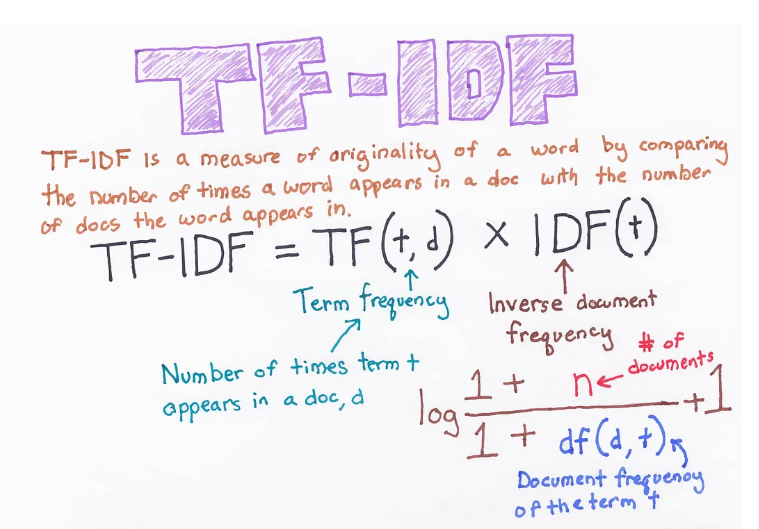

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["This is the first document.", "This document is the second document.", "And this is the third one."]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix:
[[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]


# CountVectorizer:
## Overview: CountVectorizer converts a collection of text documents to a matrix of token counts.

## Methodology: Converts a collection of text documents to a matrix of token counts.
## When to Use: Similar to BoW, commonly used in text processing tasks.
## Advantage: Simple, effective for basic tasks.
## Disadvantage: Ignores context and semantic meaning.

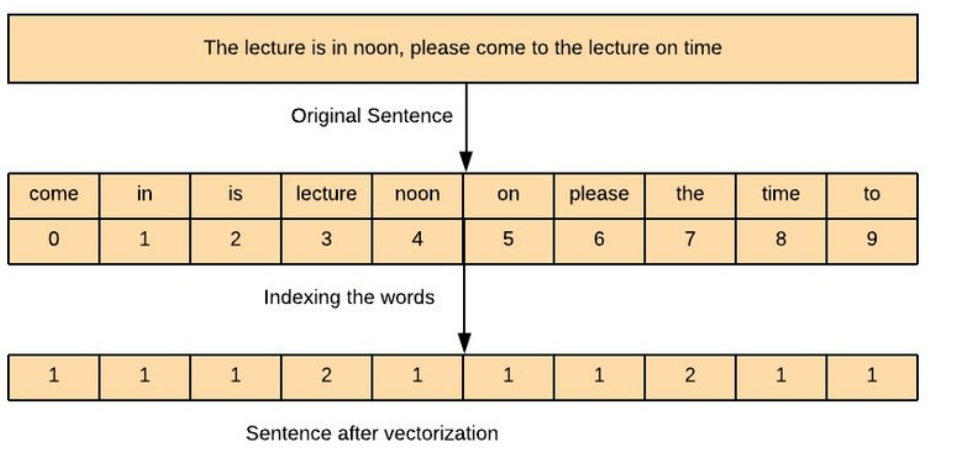

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["This is the first document.", "This document is the second document.", "And this is the third one."]

vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(corpus)

print("CountVectorizer Matrix:")
print(count_matrix.toarray())

CountVectorizer Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]]


# Co-Occurrence Vectors
## Co-occurrence vectors represent the relationships between words based on their co-occurrence patterns in a given context, such as a document or a corpus.

## Methodology: Represents words based on their co-occurrence with other words in a given context.
## When to Use: Capturing semantic relationships between words.
## Advantage: Captures semantic meaning.
## Disadvantage: Requires large amounts of data, computationally intensive.

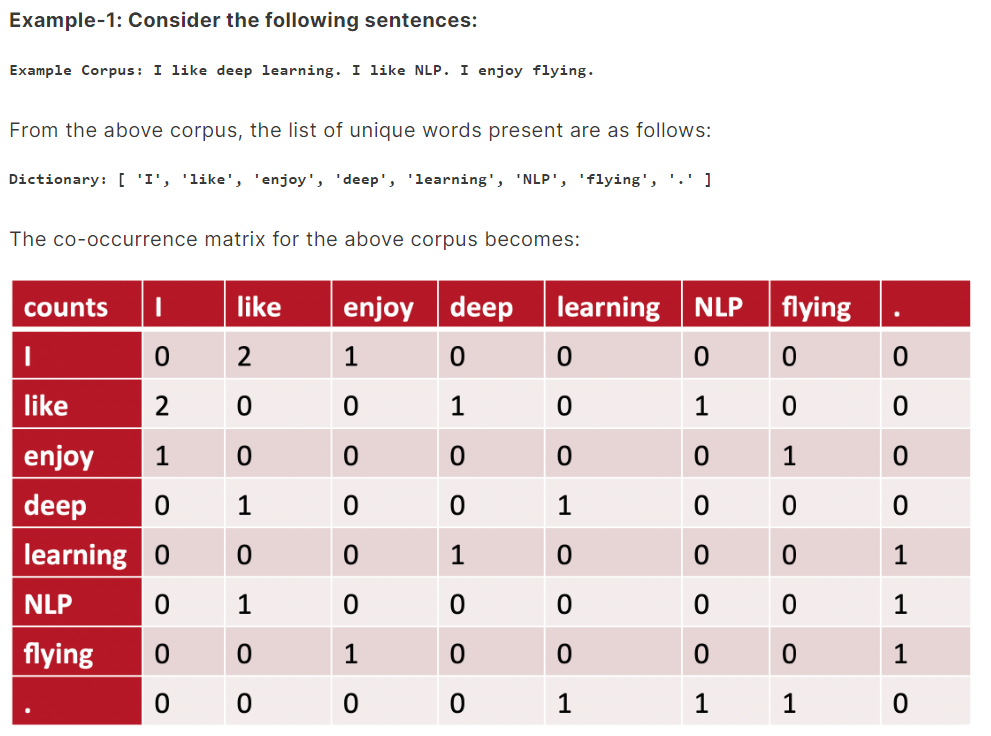

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = [
    "I love natural language processing.",
    "Natural language processing involves machine learning.",
    "Machine learning is a subfield of artificial intelligence."
]

# Create a CountVectorizer to build the co-occurrence matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Get the vocabulary and co-occurrence matrix
vocabulary = vectorizer.get_feature_names_out()
co_occurrence_matrix = X.T.dot(X)

# Display the co-occurrence matrix
print("Co-Occurrence Matrix:")
print(co_occurrence_matrix.toarray())

# Create co-occurrence vectors for specific words (e.g., 'natural', 'language', 'processing')
words_to_find = ['natural', 'language', 'processing']
co_occurrence_vectors = np.zeros((len(vocabulary), len(words_to_find)))

for i, word in enumerate(words_to_find):
    index = np.where(vocabulary == word)[0][0]
    co_occurrence_vectors[:, i] = co_occurrence_matrix[:, index].toarray().flatten()

# Display the co-occurrence vectors
for i, word in enumerate(words_to_find):
    print(f"Co-Occurrence Vector for '{word}':", co_occurrence_vectors[:, i])


Co-Occurrence Matrix:
[[1 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 0 1 0 1 0 1]
 [0 0 1 0 1 1 0 1 1 0 1 0]
 [1 1 0 1 0 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 1 2 0 2 0]
 [1 1 1 1 1 2 0 2 1 1 1 1]
 [0 0 0 0 1 0 1 0 1 0 1 0]
 [1 1 1 1 1 2 0 2 1 1 1 1]
 [0 0 1 0 2 1 1 1 2 0 2 0]
 [1 1 0 1 0 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 1 2 0 2 0]
 [1 1 0 1 0 1 0 1 0 1 0 1]]
Co-Occurrence Vector for 'natural': [0. 0. 1. 0. 2. 1. 1. 1. 2. 0. 2. 0.]
Co-Occurrence Vector for 'language': [0. 0. 1. 0. 2. 1. 1. 1. 2. 0. 2. 0.]
Co-Occurrence Vector for 'processing': [0. 0. 1. 0. 2. 1. 1. 1. 2. 0. 2. 0.]


# Word Embeddings with Word2Vec:
## Overview: Word2Vec is a popular word embedding technique that represents words as vectors in a continuous vector space. It captures semantic relationships between words.

## Methodology: Neural network-based model that learns continuous vector representations of words.
## When to Use: Word similarity, analogy, language translation.
## Advantage: Captures semantic relationships, context-aware.
## Disadvantage: Training can be computationally expensive.

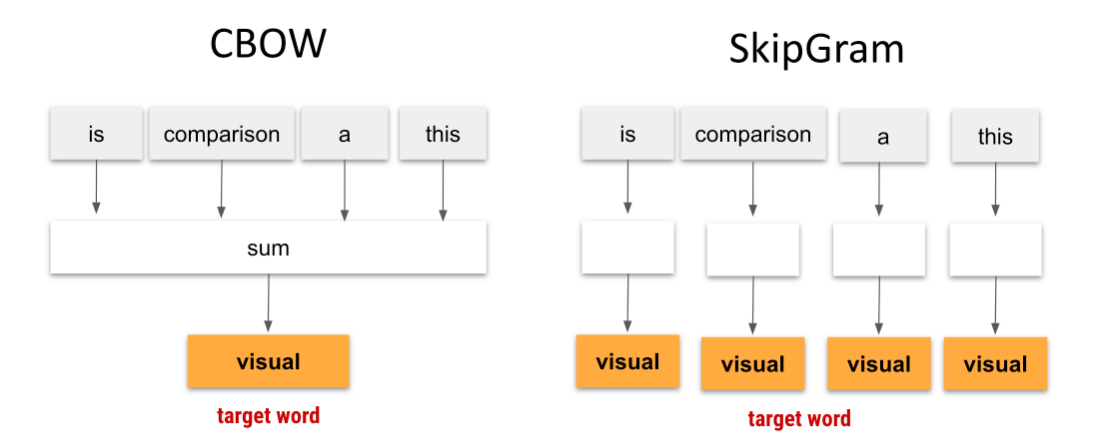

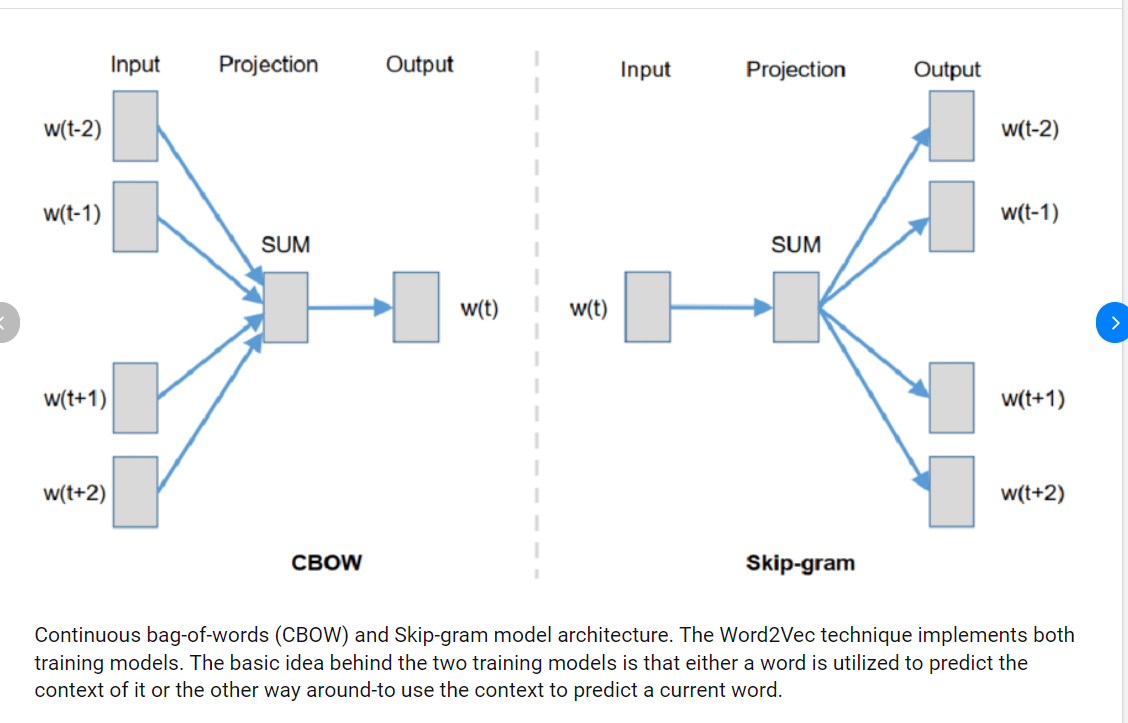

In [18]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

sentence = "Word embeddings example using Word2Vec."
tokens = word_tokenize(sentence.lower())

model = Word2Vec([tokens], vector_size=100, window=5, min_count=1, workers=4)
word_vector = model.wv['example']

print("Word2Vec Vector for 'example':", word_vector)

Word2Vec Vector for 'example': [-8.2426779e-03  9.2993546e-03 -1.9766092e-04 -1.9672764e-03
  4.6036304e-03 -4.0953159e-03  2.7431143e-03  6.9399667e-03
  6.0654259e-03 -7.5107943e-03  9.3823504e-03  4.6718083e-03
  3.9661205e-03 -6.2435055e-03  8.4599797e-03 -2.1501649e-03
  8.8251876e-03 -5.3620026e-03 -8.1294188e-03  6.8245591e-03
  1.6711927e-03 -2.1985089e-03  9.5136007e-03  9.4938548e-03
 -9.7740470e-03  2.5052286e-03  6.1566923e-03  3.8724565e-03
  2.0227872e-03  4.3050171e-04  6.7363144e-04 -3.8206363e-03
 -7.1402504e-03 -2.0888723e-03  3.9238976e-03  8.8186832e-03
  9.2591504e-03 -5.9759365e-03 -9.4026709e-03  9.7643770e-03
  3.4297847e-03  5.1661171e-03  6.2823449e-03 -2.8042626e-03
  7.3227035e-03  2.8302716e-03  2.8710044e-03 -2.3803699e-03
 -3.1282497e-03 -2.3701417e-03  4.2764368e-03  7.6057913e-05
 -9.5842788e-03 -9.6655441e-03 -6.1481940e-03 -1.2856961e-04
  1.9974159e-03  9.4319675e-03  5.5843508e-03 -4.2906962e-03
  2.7831673e-04  4.9643586e-03  7.6983096e-03 -1.14422

# Doc2Vec:
## Create fixed-size vector representations for entire documents or paragraphs.

## Methodology: Extends Word2Vec to learn vector representations for entire documents.
## When to Use: Document-level tasks, similarity analysis.
## Advantage: Represents document semantics.
## Disadvantage: Requires large datasets for training.

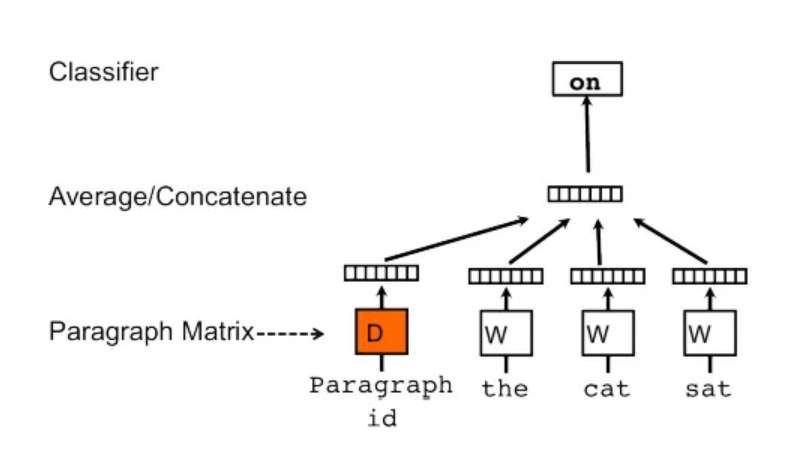

In [19]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Sample documents
documents = [
    "This is an example sentence for document 1.",
    "Another document for training Doc2Vec.",
    "Doc2Vec embeddings capture document semantics."
]

# Tokenize and tag documents
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(documents)]

# Train Doc2Vec model
model = Doc2Vec(vector_size=20, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Infer vector for a new document
new_document = "A completely new document for testing."
new_vector = model.infer_vector(word_tokenize(new_document.lower()))

# Find similar documents
similar_documents = model.docvecs.most_similar([new_vector])

# Display results
print("Inferred Vector for the New Document:")
print(new_vector)

print("\nSimilar Documents:")
for doc_id, similarity in similar_documents:
    print(f"Document {doc_id}: Similarity = {similarity}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhishek_Jaiswal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Inferred Vector for the New Document:
[ 0.00913433 -0.01606776  0.00786865 -0.00168634 -0.00616813 -0.02438825
 -0.02970823 -0.00117354 -0.01100831  0.00757701 -0.00217394  0.02749209
 -0.0086424   0.01498963 -0.00889873 -0.01935071  0.0215288  -0.01420226
  0.00585465  0.01771524]

Similar Documents:
Document 1: Similarity = 0.24449604749679565
Document 0: Similarity = 0.2404424548149109
Document 2: Similarity = 0.01952333375811577


C:\Users\Abhishek_Jaiswal\AppData\Local\Temp\ipykernel_4920\1249084438.py:27: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_documents = model.docvecs.most_similar([new_vector])


# GloVe (Global Vectors for Word Representation):
## Overview: GloVe is an unsupervised learning algorithm that learns vector representations for words by considering global word co-occurrence statistics.

## Methodology: Factorizes the word co-occurrence matrix to obtain word vectors.
## When to Use: Similar to Word2Vec, capturing word semantics.
## Advantage: Captures global context, computationally efficient.
## Disadvantage: Less flexible than Word2Vec in some contexts.

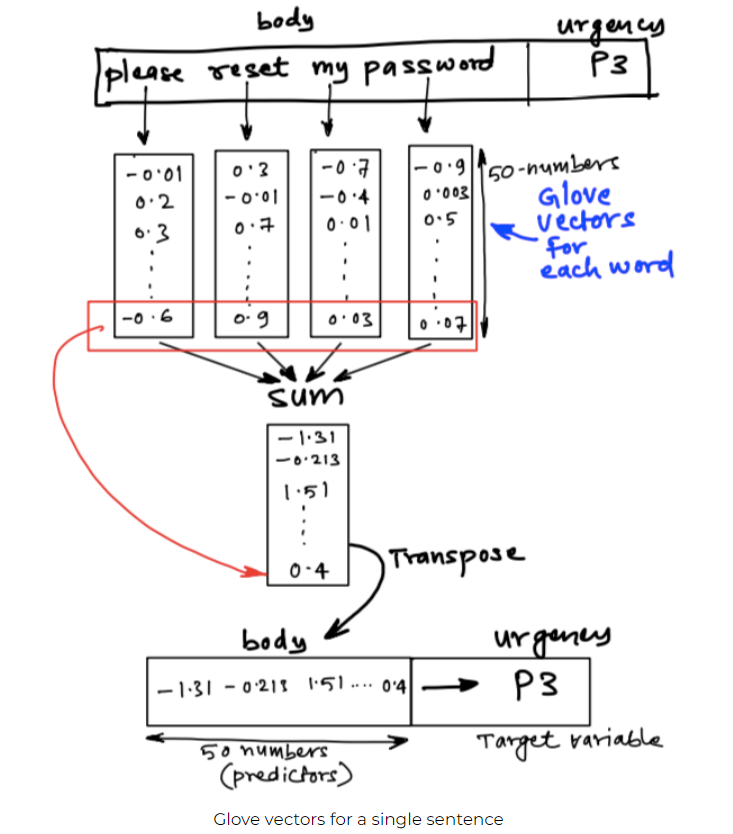

In [21]:
from gensim.models import KeyedVectors

# Download GloVe embeddings (50-dimensional vectors)
#glove_model = KeyedVectors.load_word2vec_format('path/to/glove.6B.50d.txt', binary=False)

#word_vector = glove_model['example']
#print("GloVe Vector for 'example':", word_vector)

# FastText:
## Overview: FastText is an extension of Word2Vec that considers subword information. It is capable of handling out-of-vocabulary words by breaking them into subwords.

## Methodology: Extension of Word2Vec that considers subword information.
## When to Use: Handles out-of-vocabulary words, morphologically rich languages.
## Advantage: Captures subword information.
## Disadvantage: Can be computationally expensive.

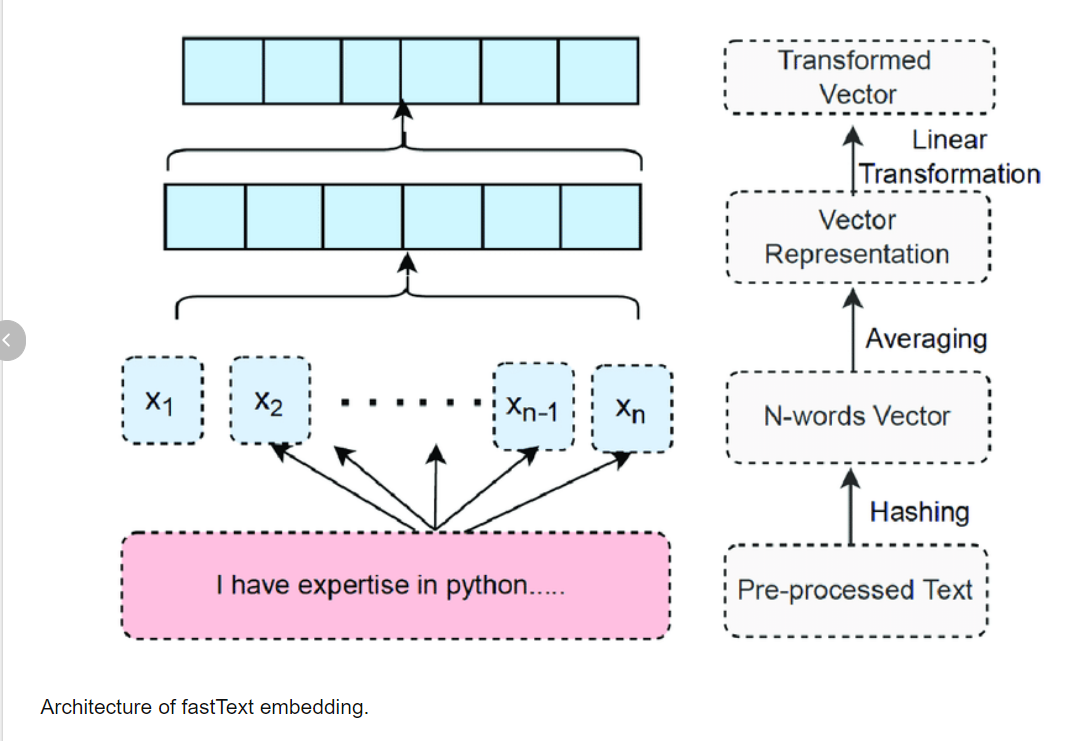

In [22]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

sentences = ["FastText embeddings example.", "Another sentence for FastText example."]

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
fasttext_model = FastText(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

word_vector = fasttext_model.wv['example']
print("FastText Vector for 'example':", word_vector)

FastText Vector for 'example': [-4.1726835e-05  1.0451592e-03 -7.9474889e-04 -1.3063694e-04
  1.6382125e-03 -1.1647420e-04  2.4407771e-03  7.9540536e-05
  1.3699072e-03 -1.8755053e-03  7.8245735e-05 -1.5996076e-04
 -8.3208835e-04  4.1482301e-04 -1.0503531e-03  7.2501454e-04
  2.0358281e-03  6.8655162e-04  2.0658619e-04 -2.7593336e-04
 -1.1705712e-03 -1.1062991e-03  2.1329117e-03 -1.0457300e-03
  4.7213794e-04 -8.8065921e-04 -1.1785245e-03  2.9314411e-05
  1.4384058e-03 -2.2715896e-03  1.6475127e-03  7.0370216e-04
  2.4665735e-05 -1.6384796e-03  3.5863672e-04  4.8421248e-04
 -6.1883865e-04  1.7340139e-03  5.8272568e-04 -1.4774782e-04
 -1.3303286e-03  3.9146931e-04 -1.3422145e-03  1.8008887e-04
 -2.2951538e-04  2.1031315e-03  2.6376569e-03  3.1128211e-04
 -9.9887443e-04 -1.5810255e-03  3.2167006e-03  2.3891455e-03
 -8.2253310e-04  1.0443755e-03 -7.4361201e-04 -6.5593526e-04
 -4.4622127e-04  1.9408112e-04 -1.9209203e-03  6.6872839e-05
 -2.2360731e-03  1.4354823e-03  5.5735483e-04 -1.70958

# Transformer-based Embeddings with BERT:
## Overview: BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based model that captures contextualized embeddings for words or sentences. It considers the entire context of a word in a sentence.

## Methodology: Transformer-based model that considers bidirectional context for word representations.
## When to Use: State-of-the-art for various NLP tasks.
## Advantage: Captures contextual information, versatile.
## Disadvantage: Computationally expensive, requires significant resources.

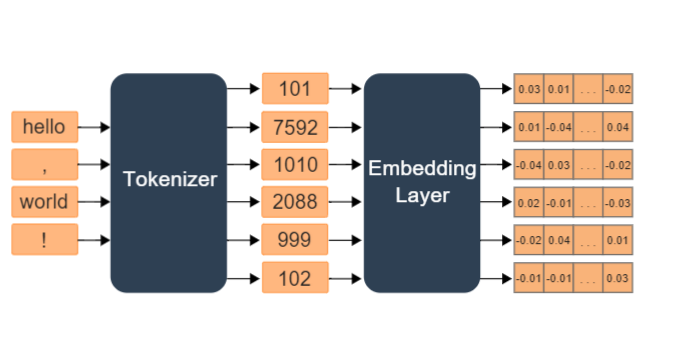

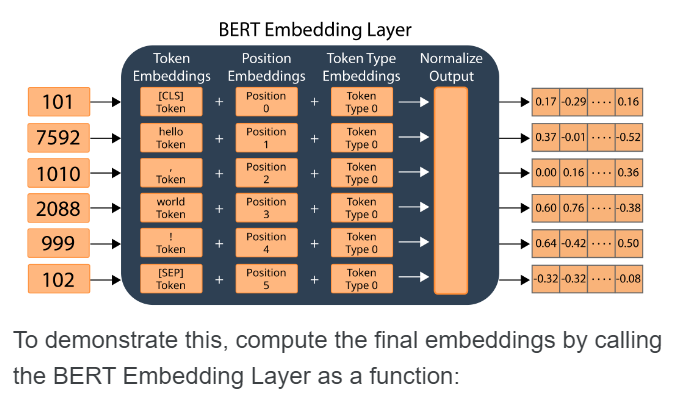

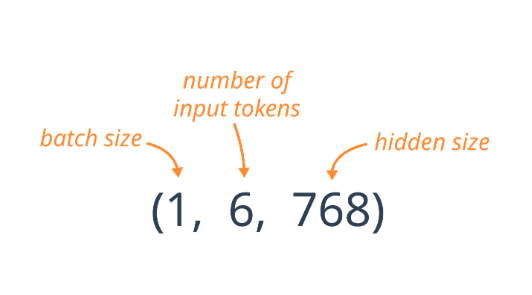

In [23]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

text = "BERT embeddings example."
input_ids = tokenizer(text, return_tensors="pt")["input_ids"]
outputs = model(input_ids)

bert_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
print("BERT Embedding:", bert_embedding)


BERT Embedding: [-2.63572663e-01 -3.31556261e-01 -3.01078498e-01 -2.97505856e-01
  1.86010420e-01 -4.19930100e-01  2.66853392e-01  3.45946759e-01
  1.01733766e-01  1.82084683e-02 -1.78565651e-01 -7.12604970e-02
 -3.31277162e-01  1.06502905e-01 -1.56765878e-01  3.92356189e-03
 -3.00724804e-01  2.69849598e-01 -2.52546161e-01 -1.69669107e-01
  1.49439067e-01  6.65292665e-02 -7.01846600e-01 -2.26758420e-02
  7.61362493e-01  1.72867440e-02  2.83978749e-02 -2.72862911e-01
 -7.56983936e-01  2.45770529e-01  8.79423916e-02  3.43298703e-01
  3.81972343e-02 -7.75864068e-03 -4.81050640e-01 -2.70018667e-01
  4.49225843e-01 -1.39791787e-01 -7.96206072e-02  3.56219292e-01
 -6.02236748e-01 -4.13774520e-01  6.95797741e-01  1.60257313e-02
  1.57124162e-01 -1.56724244e-01 -3.73370618e-01 -8.48812684e-02
  5.70420437e-02 -1.13121934e-01 -7.98189402e-01  2.66736805e-01
  1.56094670e-01  3.93177629e-01  1.45533696e-01  2.94677317e-01
  4.05181646e-01 -6.90931559e-01  1.79678217e-01 -1.52262211e-01
  4.0680

In [ ]:
# BERT: https://tinkerd.net/blog/machine-learning/bert-embeddings/

# Sentence-BERT (SBERT):
## Overview: SBERT is an extension of BERT designed to generate sentence embeddings. It utilizes a siamese network structure to learn sentence embeddings that capture semantic similarity.

## Methodology: Extends BERT to learn sentence embeddings.
## When to Use: Similarity analysis, clustering at the sentence level.
## Advantage: Captures contextual information for sentences.
## Disadvantage: Computationally expensive.

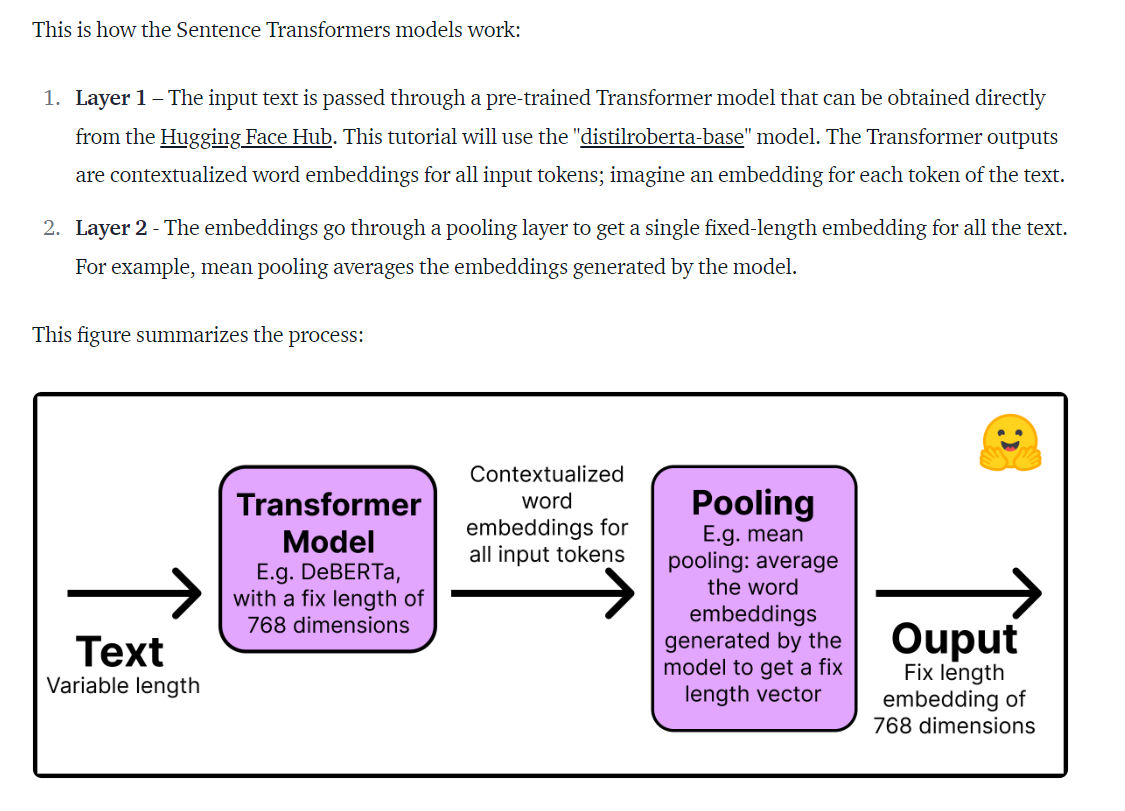

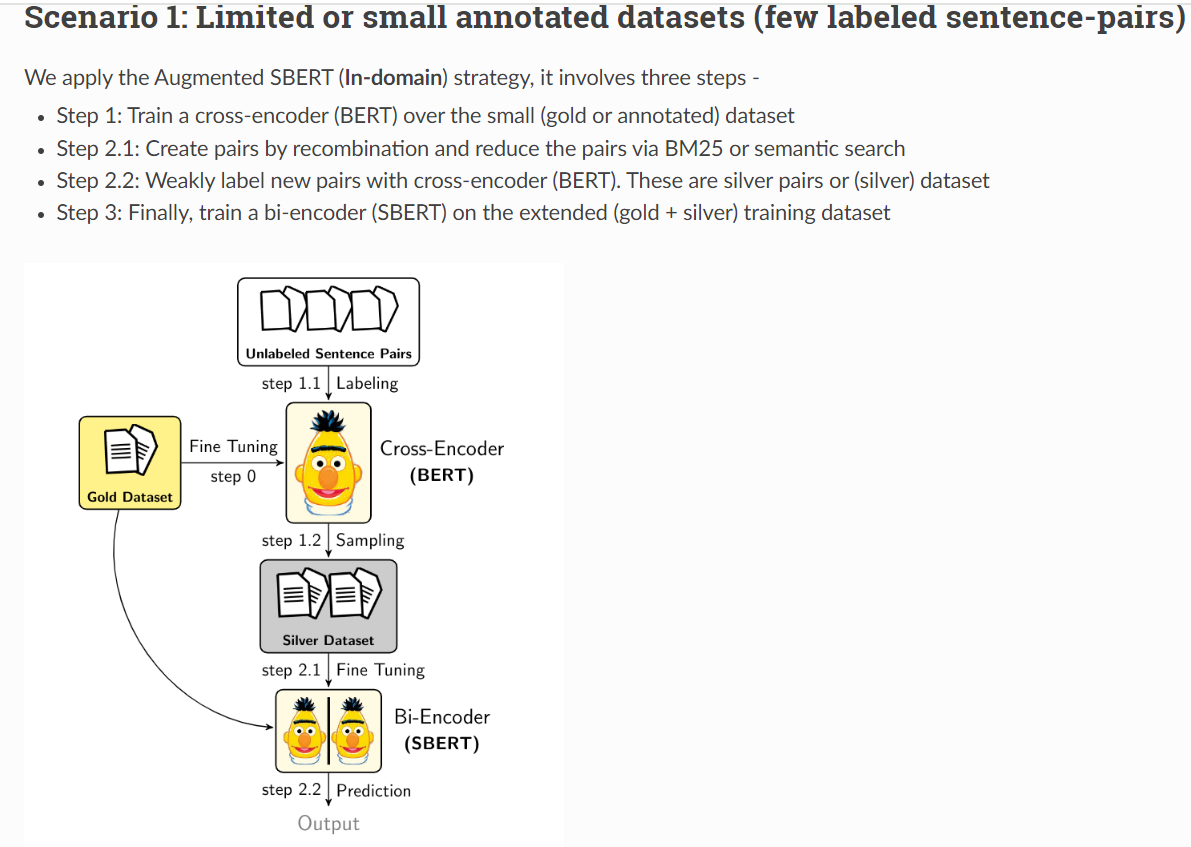

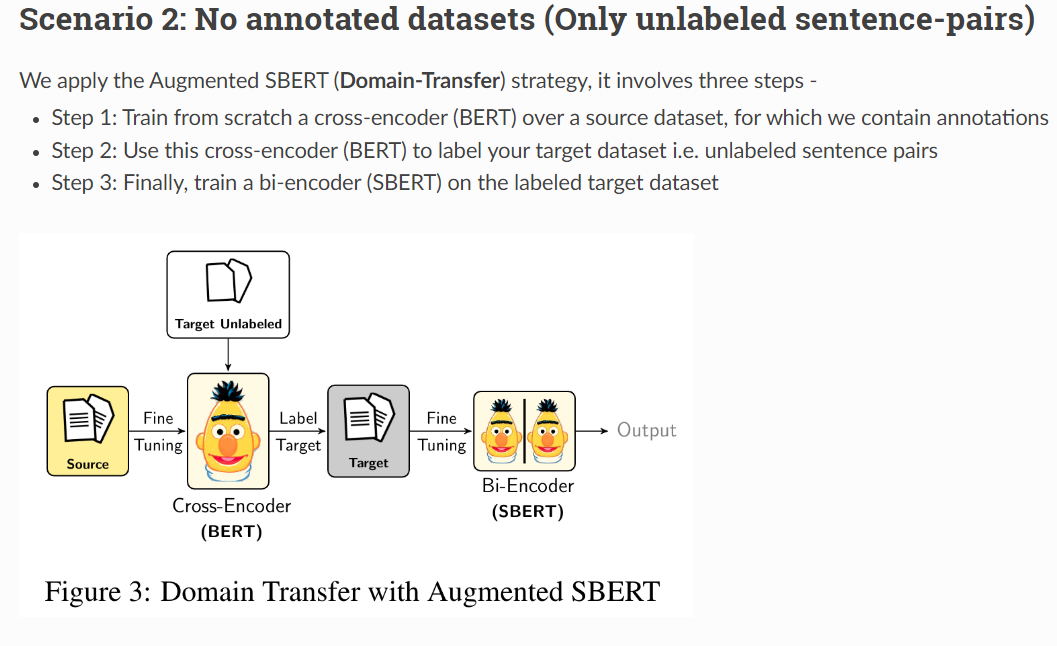

In [6]:
from sentence_transformers import SentenceTransformer, models

## Step 1: use an existing language model
word_embedding_model = models.Transformer('distilroberta-base')
word_embedding_model
## Step 2: use a pool function over the token embeddings
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
pooling_model
## Join steps 1 and 2 using the modules argument
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
model

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

C:\Users\Abhishek_Jaiswal\AppData\Local\miniconda3\envs\mlenv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Abhishek_Jaiswal\.cache\huggingface\hub\models--distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

## Train and Fine-Tune Sentence Transformers Models
## https://huggingface.co/blog/how-to-train-sentence-transformers

In [5]:
from sentence_transformers import SentenceTransformer, SentencesDataset, losses
from sentence_transformers.readers import InputExample

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
train_examples = [InputExample(texts=['Sentence from class 0'], label=0), 
                  InputExample(texts=['Another sentence from class 0'], label=0),
                  InputExample(texts=['Sentence from class 1'], label=1), 
                  InputExample(texts=['Sentence from class 2'], label=2)]
train_dataset = SentencesDataset(train_examples, model)
#BatchAllTripletLoss
train_loss = losses.BatchAllTripletLoss(model=model)
train_loss

BatchAllTripletLoss(
  (sentence_embedder): SentenceTransformer(
    (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
    (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  )
)

In [24]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sentences = ["SBERT embeddings example.", "Another sentence for SBERT example."]

sbert_embeddings = model.encode(sentences)
print("SBERT Embeddings:", sbert_embeddings)


SBERT Embeddings: [[-2.78134048e-01 -3.04168370e-02 -5.99764585e-02 -2.09489867e-01
   2.54968349e-02 -8.34133774e-02  3.52608323e-01 -2.75598019e-01
  -3.70376743e-02 -5.74031711e-01  1.86858475e-01  4.87667799e-01
   1.38373464e-01 -2.16210052e-01  4.24110025e-01  4.66380358e-01
   3.10919344e-01  1.08791995e+00 -5.53535402e-01 -3.52626622e-01
   6.70206189e-01 -1.28353864e-01  5.05717192e-03  5.34965880e-02
   2.68644780e-01  3.01326692e-01  2.43460566e-01 -1.01914689e-01
   2.52551615e-01 -9.07370269e-01  1.31337419e-01 -1.81816176e-01
  -4.57603782e-01  1.52548835e-01 -3.60934645e-01 -2.41186731e-02
  -4.72432852e-01  7.16334939e-01 -3.93797338e-01 -2.12378904e-01
  -2.57432550e-01  2.45000906e-02 -1.99959829e-01 -4.83026728e-02
  -1.19714692e-01 -8.12361598e-01  6.46489039e-02 -8.89339894e-02
   9.72957835e-02  2.26182155e-02  1.67141348e-01 -5.19643664e-01
  -2.64014423e-01 -3.75751883e-01 -8.50868523e-02  3.49136829e-01
   1.70415267e-01  3.77623230e-01  2.94291470e-02 -2.14277

## Losses
## sentence_transformers.losses define different loss functions, that can be used to fine-tune the network on training data. The loss function plays a critical role when fine-tuning the model. It determines how well our embedding model will work for the specific downstream task.

## https://www.sbert.net/docs/package_reference/losses.html#:~:text=The%20loss%20function%20plays%20a,and%20on%20the%20target%20task.

### Loss functions for training a Sentence Transformers model

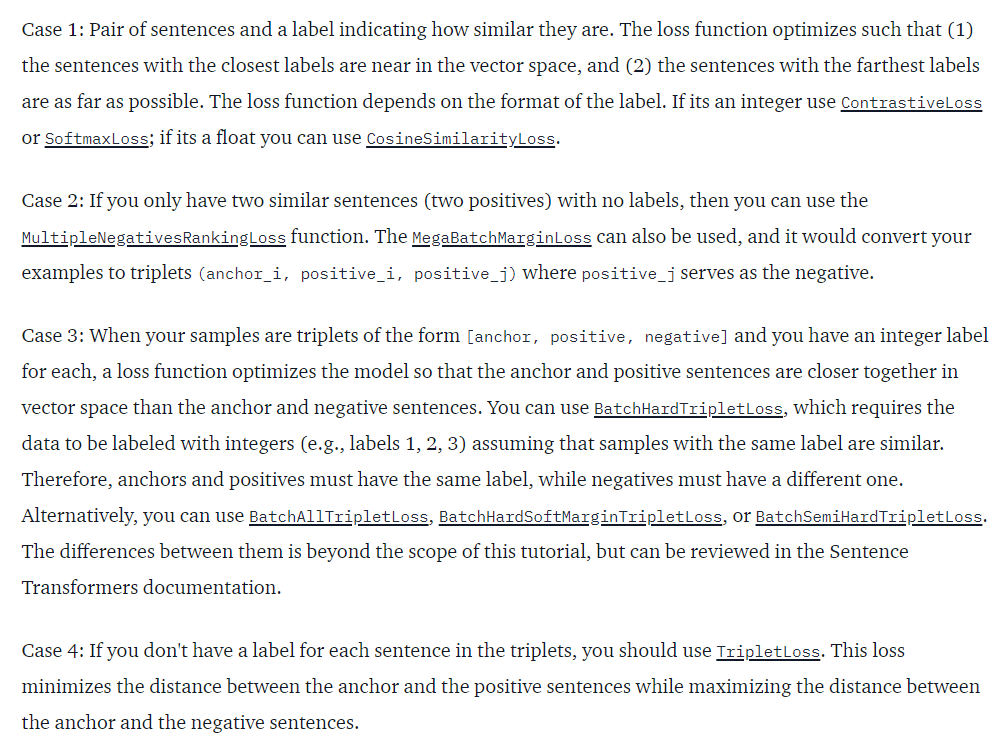

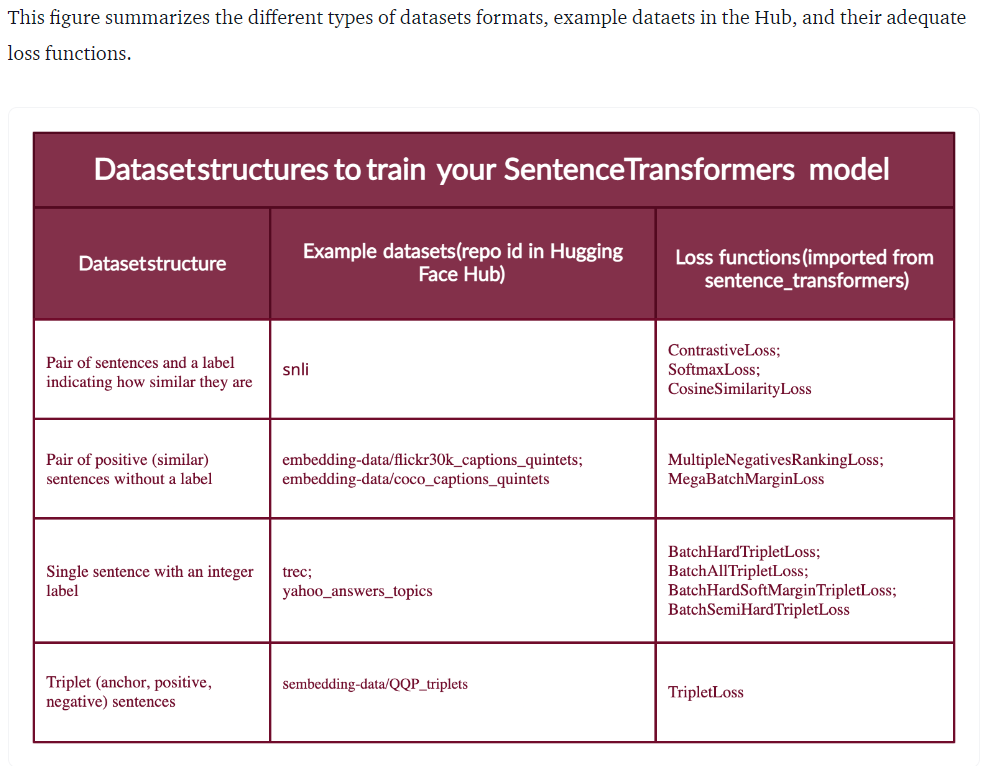

In [ ]:
#https://www.sbert.net/examples/training/data_augmentation/README.html

# Universal Sentence Encoder (USE) - TensorFlow Hub:
## The Universal Sentence Encoder provides pre-trained embeddings for sentences or short texts.

## Methodology: Embeds sentences into fixed-size vectors using a deep averaging network.
## When to Use: Sentence-level tasks, semantic similarity.
## Advantage: Efficient, captures semantic meaning.
## Disadvantage: May not capture complex context as well as BERT.

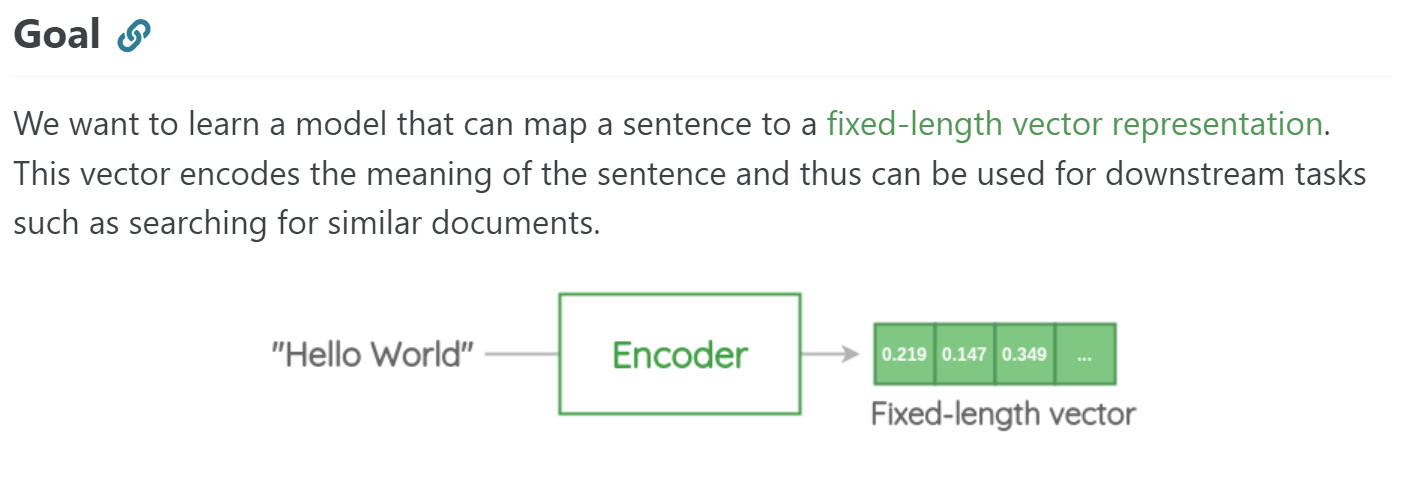

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

# Download the USE model
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Example sentences
sentences = ["This is an example sentence.", "Another sentence for testing USE embeddings."]

# Get USE embeddings
embeddings = use_model(sentences)

# Display embeddings
for i, sentence in enumerate(sentences):
    print(f"Embedding for Sentence {i + 1}:", embeddings[i].numpy())

Embedding for Sentence 1: [ 6.23825677e-02  2.08217185e-02  3.80545994e-03  2.92493701e-02
 -7.32270256e-02 -1.97310396e-03 -1.66500621e-02  3.30244526e-02
  6.92790141e-03  5.26215322e-02 -1.02989255e-02 -1.13194976e-02
 -6.23090053e-03  1.00084148e-01  1.80095788e-02 -9.93793383e-02
 -1.39244348e-02 -1.76650397e-02 -4.52030301e-02 -5.56311309e-02
  7.91292191e-02  3.78863327e-02 -1.52981188e-02 -5.07256621e-03
 -5.49593009e-02  7.23988712e-02  2.90205423e-02 -5.82795814e-02
 -5.40222926e-03 -1.69341322e-02  2.15250496e-02  8.37892015e-03
  5.60170691e-03 -1.65353399e-02 -9.10105258e-02 -2.74207182e-02
  5.25665618e-02  7.65372487e-03  6.13682147e-04 -2.69717146e-02
  4.83603496e-03  2.30624042e-02  6.15627244e-02  7.88372904e-02
 -5.29996455e-02 -3.27655710e-02  2.29131859e-02 -2.13253815e-02
 -2.20250729e-02  1.78519897e-02  2.50901114e-02 -6.34129271e-02
 -1.00854225e-01 -1.90066118e-02 -2.80478578e-02 -1.85554624e-02
 -6.91876933e-02  3.61712649e-02 -5.96616305e-02 -3.40971164e-02

In [ ]:
#https://amitness.com/2020/06/universal-sentence-encoder/

# BART (Facebook's denoising autoencoder) - Hugging Face Transformers:
## BART is a pre-trained sequence-to-sequence model that can be used for text generation and representation.

## Methodology: Transformer-based model trained for text generation and summarization.
## When to Use: Text generation, summarization.
## Advantage: Effective for sequence-to-sequence tasks.
## Disadvantage: Resource-intensive during training.

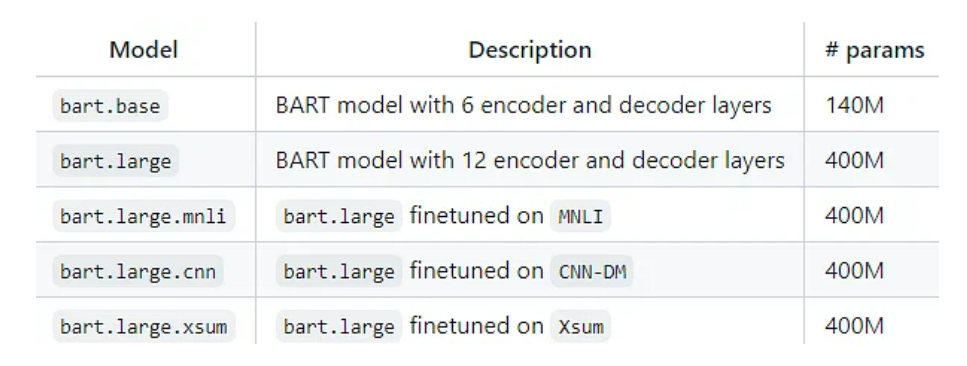

In [32]:
from transformers import BartTokenizer, BartForSequenceClassification
import torch

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-cnn')

# Example sentence
sentence = "BART embeddings example."

# Tokenize and get BART embeddings
input_ids = tokenizer(sentence, return_tensors="pt")["input_ids"]
logits = model(input_ids).logits
output = torch.nn.functional.softmax(logits, dim=1).detach().numpy()

# Display BART embeddings
print("BART Embedding:", output)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-cnn and are newly initialized: ['classification_head.dense.weight', 'classification_head.out_proj.weight', 'classification_head.dense.bias', 'classification_head.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BART Embedding: [[0.33659527 0.33027166 0.33313304]]


# ELMo (Embeddings from Language Models) - TensorFlow Hub:
## ELMo provides contextual word embeddings based on the internal states of a pre-trained language model.

## Methodology: Contextual word embeddings using a bidirectional LSTM language model.
## When to Use: Tasks requiring contextual embeddings.
## Advantage: Captures word sense and context.
## Disadvantage: Computationally expensive, less interpretable.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Download the ELMo model
elmo_model = hub.load("https://tfhub.dev/google/elmo/3")

# Example sentences
sentences = ["This is an example sentence.", "Another sentence for testing ELMo embeddings."]

# Get ELMo embeddings
embeddings = elmo_model(sentences)["elmo"]

# Display embeddings
for i, sentence in enumerate(sentences):
    print(f"Embedding for Sentence {i + 1}:", embeddings[i].numpy())

# InferSent - Sent2Vec:
## InferSent is a sentence embeddings method that is trained on natural language inference data.

## Methodology: Trained on natural language inference data using a sentence encoder.
## When to Use: Sentence-level tasks, similarity analysis.
## Advantage: Effective for sentence-level tasks.
## Disadvantage: Limited to sentence embeddings.

In [ ]:
from models import InferSent
import torch

# Load InferSent model
infersent_model = InferSent({'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048, 'pool_type': 'max'})
infersent_model.load_state_dict(torch.load('path/to/infersent_model.pkl'))
infersent_model.set_w2v_path('path/to/glove.840B.300d.txt')

# Example sentences
sentences = ["This is an example sentence.", "Another sentence for testing InferSent embeddings."]

# Build vocabulary
infersent_model.build_vocab(sentences, tokenize=True)

# Get InferSent embeddings
embeddings = infersent_model.encode(sentences, tokenize=True)

# Display embeddings
for i, sentence in enumerate(sentences):
    print(f"InferSent Embedding for Sentence {i + 1}:", embeddings[i])


# Openai Embeddings

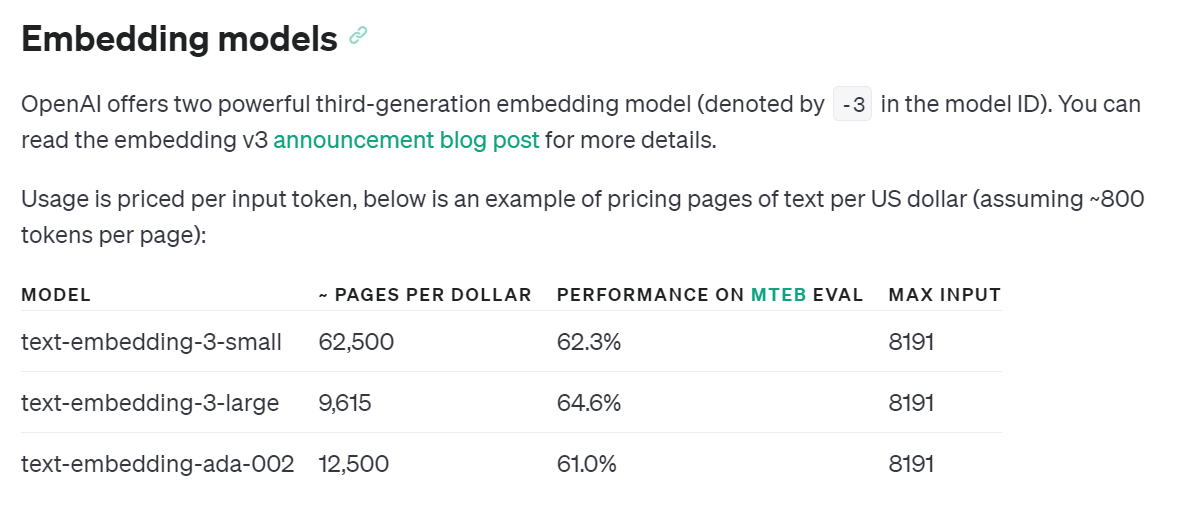

In [ ]:
import os
import openai
from scipy.spatial import distance
import plotly.express as px
from sklearn.cluster import KMeans
from umap import UMAP

In [ ]:
openai.api_key = "<YOUR_API_KEY_HERE>"

In [ ]:
def get_embedding(text_to_embed):
	# Embed a line of text
	response = openai.Embedding.create(
    	model= "text-embedding-ada-002",
    	input=[text_to_embed]
	)
	# Extract the AI output embedding as a list of floats
	embedding = response["data"][0]["embedding"]
    
	return embedding

In [ ]:
import pandas as pd

data_URL =  "https://raw.githubusercontent.com/keitazoumana/Experimentation-Data/main/Musical_instruments_reviews.csv"

review_df = pd.read_csv(data_URL)
review_df.head()

In [ ]:
review_df = review_df.sample(100)
review_df["embedding"] = review_df["reviewText"].astype(str).apply(get_embedding)

# Make the index start from 0
review_df.reset_index(drop=True)

review_df.head(10)

In [ ]:
# https://platform.openai.com/docs/guides/embeddings/use-cases
#https://www.datacamp.com/tutorial/introduction-to-text-embeddings-with-the-open-ai-api

# Text Embedding Categories: Semantic vs. Contextual

## Semantic Embeddings:
## 1. Focus on capturing word or sentence meanings.
## 2. Suitable for tasks emphasizing meaning, where context may not be crucial.

## Contextual Embeddings:
## 1. Consider context for more nuanced and dynamic representations.
## 2. Essential for tasks where understanding context is vital.

### Semantic Text Embeddings:

### Objective:
### Capture the inherent meaning or semantics of words and sentences.
### Aim to represent words with similar meanings as close vectors in the embedding space.

### Examples: Word2Vec, GloVe, FastText: Learn embeddings based on co-occurrence patterns to encode semantic relationships.
### InferSent: Trained on natural language inference data, capturing semantic relationships between sentences.

### Characteristics:
### Suitable for tasks where understanding the meaning of words or sentences is crucial.
### Words with similar meanings should have similar embeddings.

### Contextual Text Embeddings:

### Objective:
### Consider the context in which words or sentences appear.
### Embeddings vary based on the surrounding context, providing a more nuanced representation.

### Examples:
### ELMo (Embeddings from Language Models): Generates contextual embeddings by considering internal states of a language model.
### BERT (Bidirectional Encoder Representations from Transformers): Produces contextualized word embeddings by considering bidirectional context.
### GPT (Generative Pre-trained Transformer): Generates embeddings based on the entire context of a sentence.

### Characteristics:
### Valuable for tasks where the meaning of a word or sentence depends on the context.
### Provides a more dynamic and adaptable representation, capturing nuances in meaning.

### Overview:
### Contextual embeddings consider the context in which words or sentences appear, allowing for more nuanced and adaptable representations.

### Choosing Between Them:
### Contextual Embeddings are essential for tasks where understanding context is vital, such as in natural language understanding and generation.

### Hybrid Approaches:

### Some models combine both semantic and contextual aspects for richer representations.
### Universal Sentence Encoder (USE): Embeds sentences with consideration of both semantic meaning and context.
### SBERT (Sentence-BERT): Fine-tunes BERT specifically for sentence embeddings, capturing both semantic and contextual information.